#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
#### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Importing and Understanding Data

In [17]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [18]:
# Importing day.csv
df_bike = pd.read_csv('day.csv')

# Looking at the first five rows
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
df_bike.shape

(730, 16)

In [20]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [21]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the Data

#### Visualising Numeric Variables

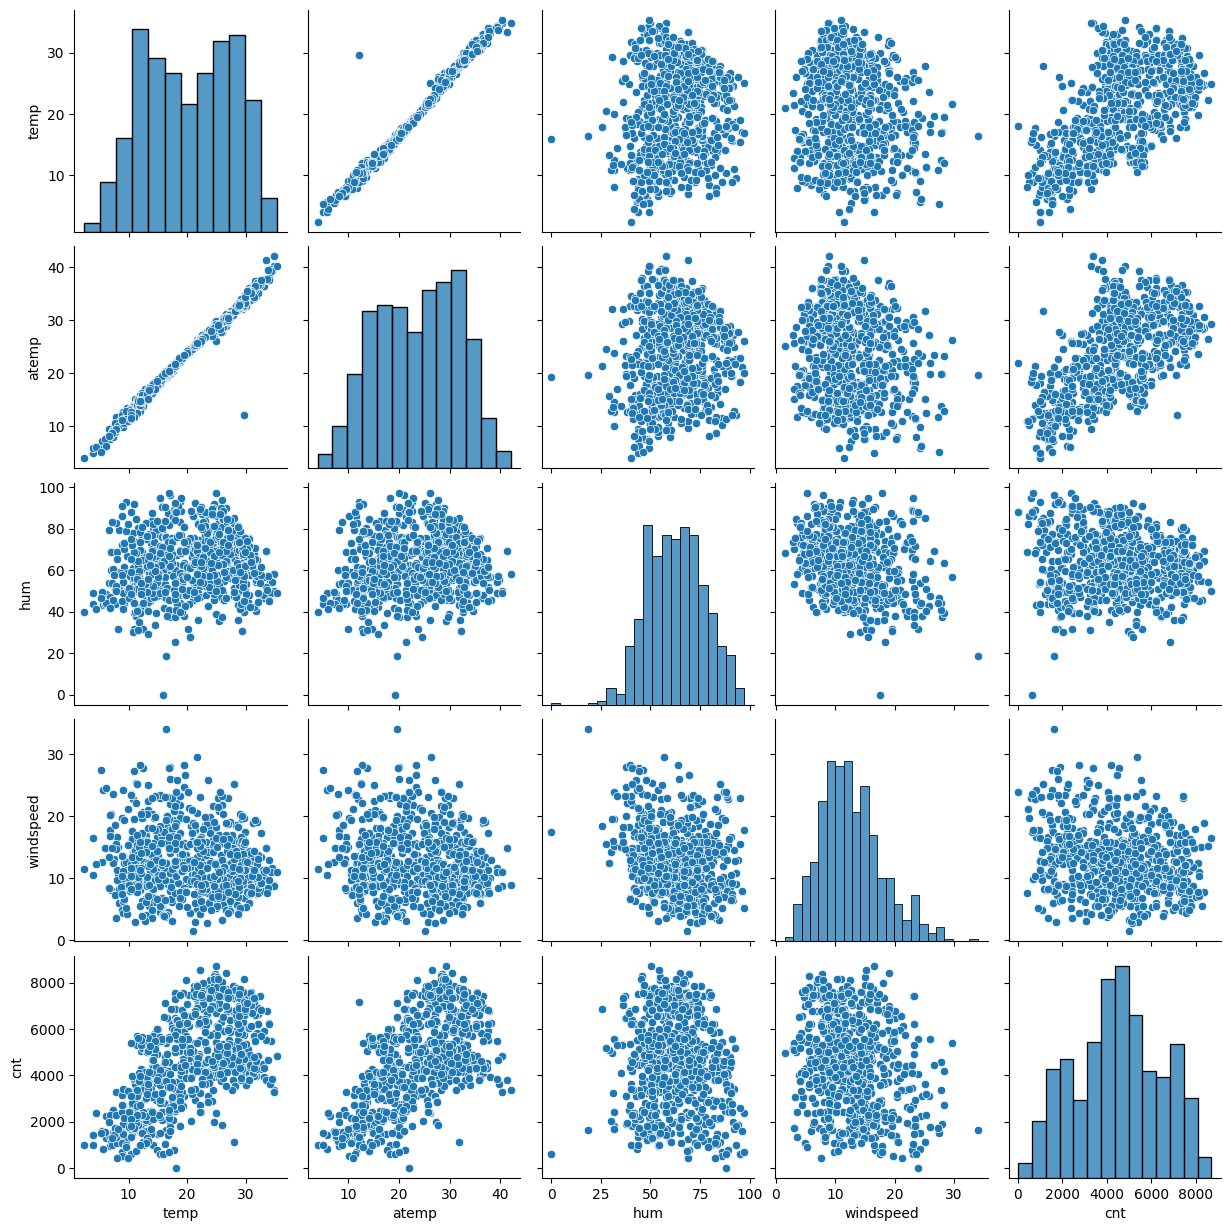

In [22]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
sns.pairplot(df_bike[num_vars])

#### Visualising Categorical Variables

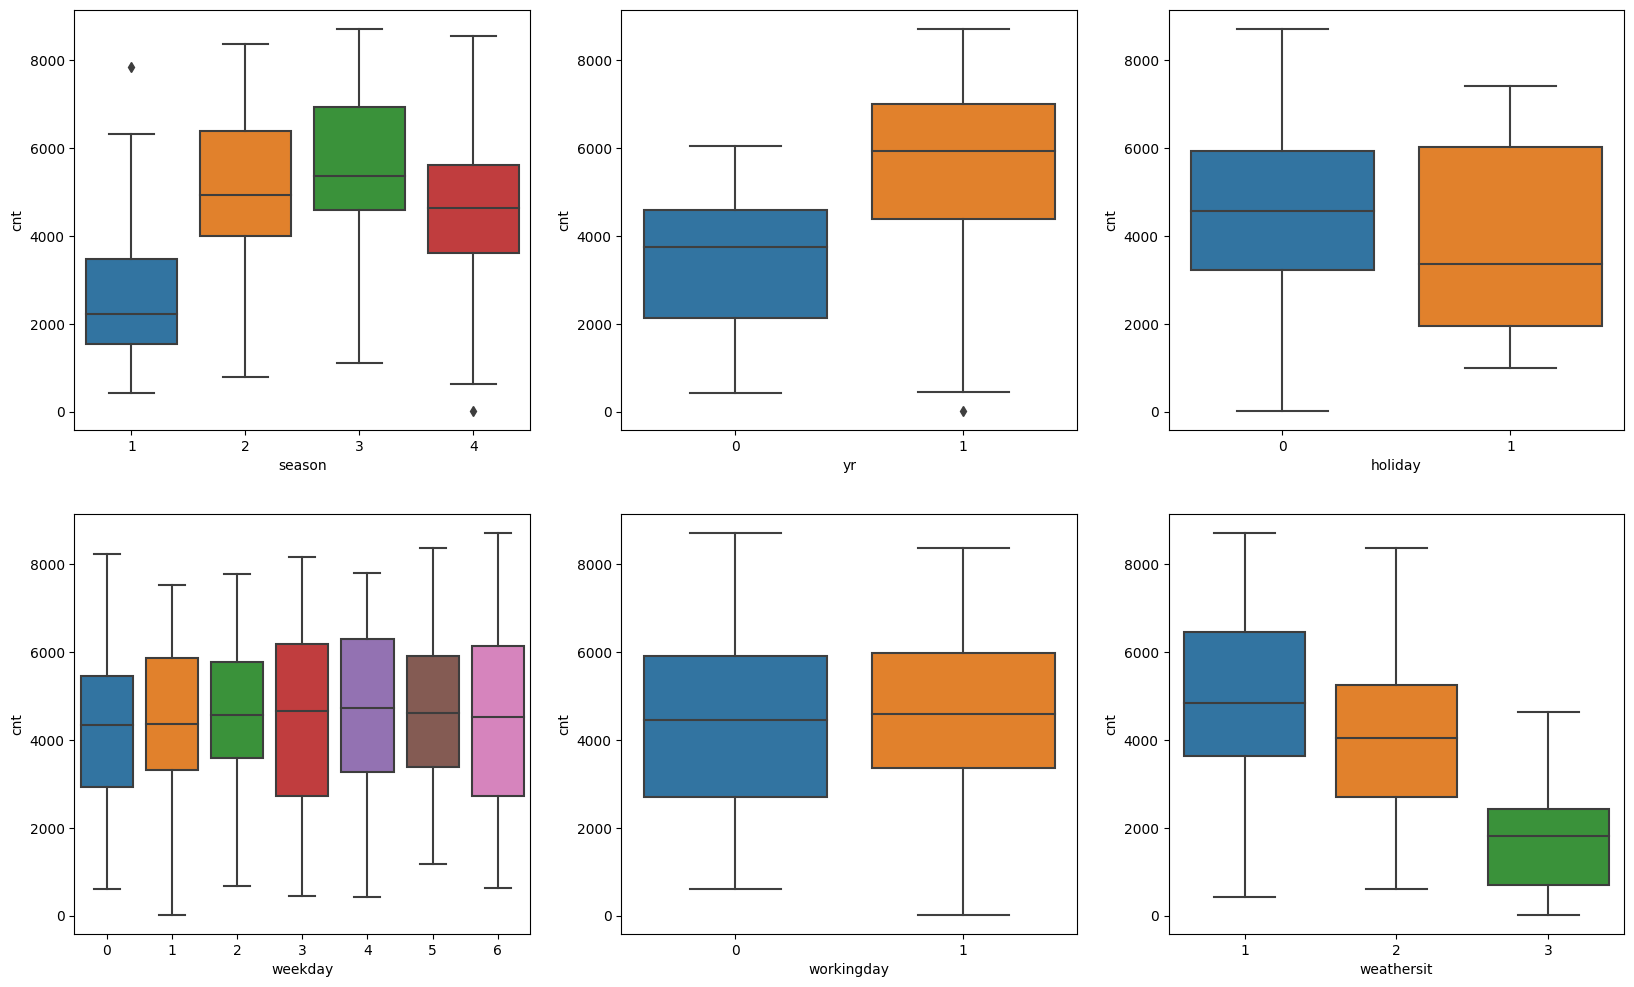

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.show()

## Data Preparation

#### Dummy Variables

In [24]:
# Defining the label function
def label_season(season):
    if season==1:
        return "Spring"
    if season==2:
        return "Summer"
    if season==3:
        return "Fall"
    if season==4:
        return "Winter"
# Applying the function to the season feature
df_bike['season']=df_bike.season.apply(label_season).astype('str')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
# Get the dummy variables for the feature
seasons=pd.get_dummies(df_bike['season'],drop_first=True)
seasons.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
# Add the results to the original dataframe
df_bike=pd.concat([df_bike,seasons],axis=1)
df_bike=df_bike.drop('season',axis=1)

In [27]:
# Defining the label function
def label_weathersit(weathersit):
    if weathersit==1:
        return "Cloudy"
    if weathersit==2:
        return "Mist"
    if weathersit==3:
        return "Light Rain"
# Applying the function to the weathersit feature    
df_bike['weathersit']=df_bike.weathersit.apply(label_weathersit).astype('str')
df_bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,1,01-01-2018,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,0,1,0,1,1,Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,0,1,0,2,1,Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,0,1,0,3,1,Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [28]:
# Get the dummy variables for the feature
weather=pd.get_dummies(df_bike['weathersit'],drop_first=True)
weather.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [29]:
# Add the results to the original dataframe
df_bike=pd.concat([df_bike,weather],axis=1)
df_bike=df_bike.drop('weathersit',axis=1)

#### Dropping Redundant Variables

In [30]:
redundant_vars = ['instant','dteday','casual','registered']
df_bike=df_bike.drop(redundant_vars,axis=1)

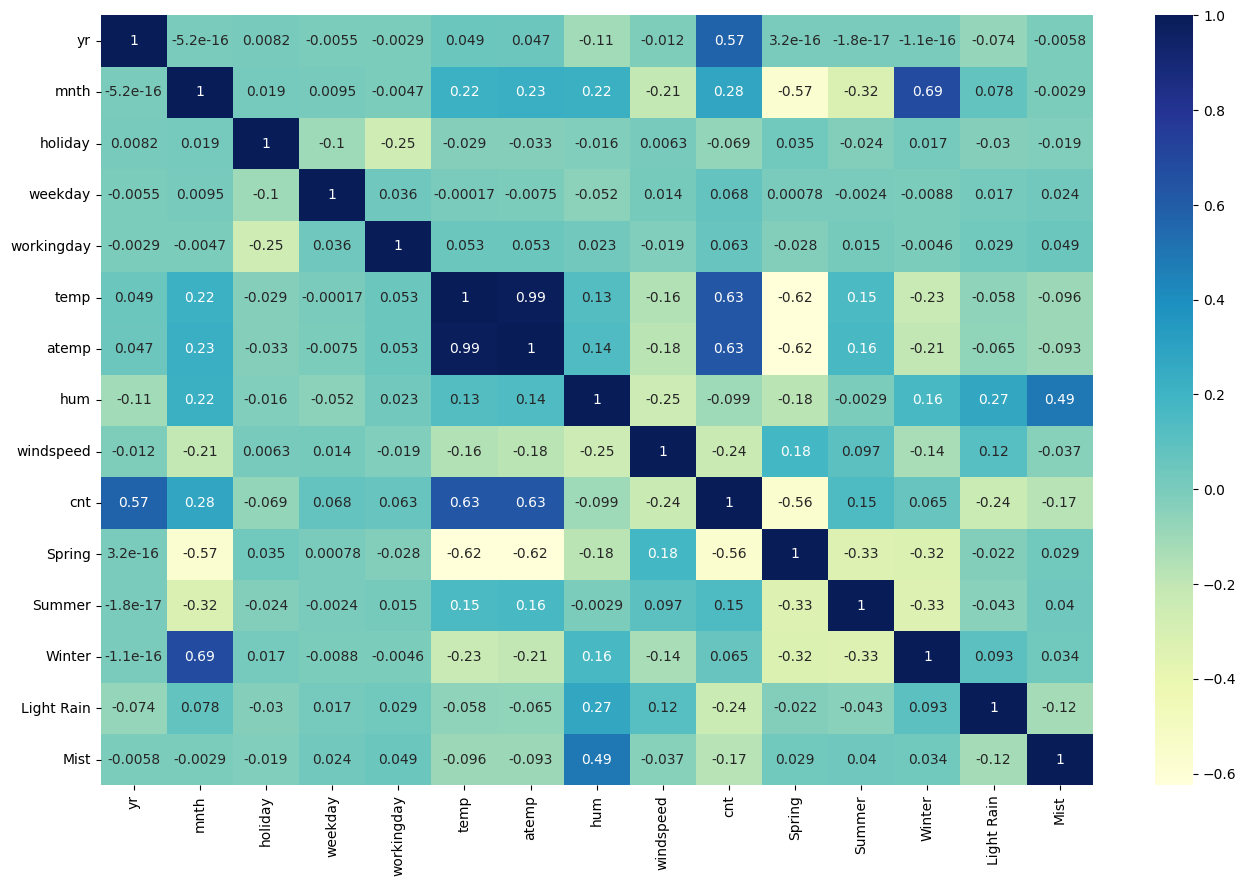

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Splitting the Data into Training and Testing Sets

In [32]:
df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Rain,Mist
653,1,10,0,2,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0
576,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0
426,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,1
728,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0
482,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,1


#### Rescaling the Features

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Rain,Mist
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


#### Dividing into X and Y sets for the model building

In [35]:
y_train=df_train['cnt']
X_train=df_train.drop('cnt',axis=1)

## Building our model

#### RFE - Recursive feature elimination

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 8),
 ('holiday', True, 1),
 ('weekday', False, 7),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 4),
 ('Winter', False, 3),
 ('Light Rain', True, 1),
 ('Mist', False, 2)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Light Rain'], dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'atemp', 'Summer', 'Winter', 'Mist'], dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()    # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     299.5
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          1.10e-174
Time:                        16:54:12   Log-Likelihood:                 457.74
No. Observations:                 510   AIC:                            -899.5
Df Residuals:                     502   BIC:                            -865.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4375      0.030     14.424      0.0

## Checking VIF

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.48
3,temp,1.63
6,Spring,1.62
4,hum,1.21
5,windspeed,1.13
7,Light Rain,1.10
1,yr,1.02
2,holiday,1.01


#### Dropping the variable and updating the model

#### The constant has a significantly high VIF. Hence, this variable isn't of much use and should be dropped.

In [42]:
X_train_new=X_train_rfe.drop('const',axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.75
2,temp,8.39
4,windspeed,3.86
0,yr,2.03
5,Spring,1.78
6,Light Rain,1.10
1,holiday,1.03


#### Dropping another variable and updating the model

#### The variable 'humidity' has a high VIF. Hence, this variable should also be dropped.

In [43]:
X_train_final=X_train_new.drop('hum',axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.64
2,temp,3.37
0,yr,2.02
4,Spring,1.50
5,Light Rain,1.05
1,holiday,1.03


In [44]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_final)
lm = sm.OLS(y_train,X_train_sm).fit()     # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     315.3
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          7.11e-167
Time:                        16:54:14   Log-Likelihood:                 436.45
No. Observations:                 510   AIC:                            -858.9
Df Residuals:                     503   BIC:                            -829.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2804      0.020     14.278      0.0

## Residual Analysis of the train data

In [45]:
y_train_cnt=lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

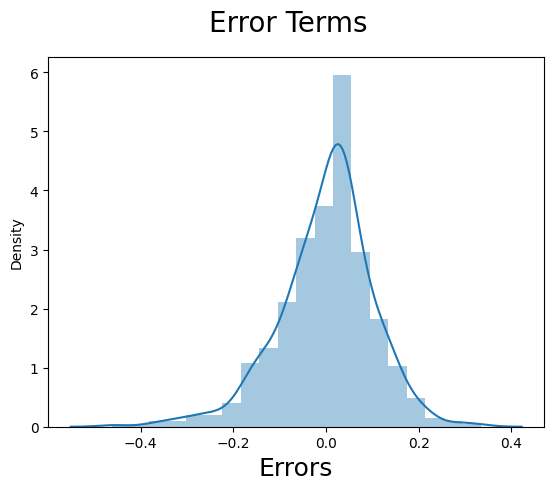

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [47]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Rain,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,3.018265,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,3.421875,0.188034,1.988415,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [48]:
y_test=df_test['cnt']
X_test=df_test.drop('cnt',axis=1)

In [49]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_final.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [50]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

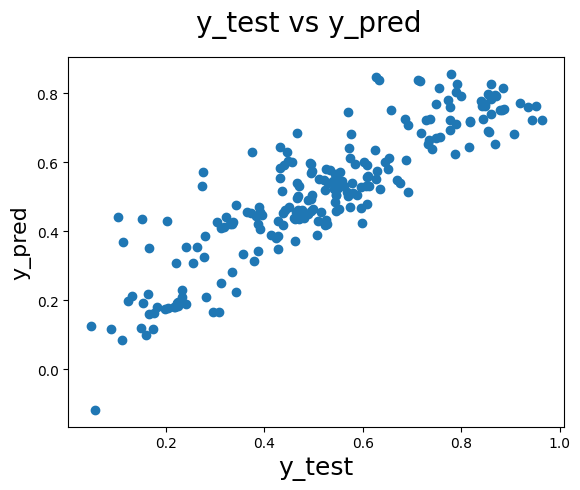

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### R2 Score

In [52]:
# Calculating the R2 Score of the model
r2_score(y_test, y_pred)

0.7795743876610906